  #                __LUNGS CANCER DETECTION USING SALIENCY MAP__

## __DATA PREPROCESSING__

In [24]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Define the path to the "ObjectDetection" folder on your desktop
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
object_detection_path = os.path.join(desktop_path, "ObjectDetection")

# Define the paths to the "cancer" and "not_cancer" datasets within the "ObjectDetection" folder
cancer_dataset_path = os.path.join(object_detection_path, "cancer")
not_cancer_dataset_path = os.path.join(object_detection_path, "not_cancer")

# Function to load and preprocess images from a folder
def load_and_preprocess_images(folder_path):
    images = []
    labels = []
    
    for image_file in os.listdir(folder_path):
        if image_file.endswith(".jpg") or image_file.endswith(".png"):
            image_path = os.path.join(folder_path, image_file)
            img = Image.open(image_path)
            img = img.resize((256, 256))  # Resize to a common size (adjust as needed)
            img = np.array(img) / 255.0 # Normalize pixel values
            mean_pixel_value = np.mean(img)
            img -= mean_pixel_value

            images.append(img)
            
            # Extract the label from the folder name
            label = os.path.basename(folder_path)
            labels.append(label)
    
    return images, labels

# Load and preprocess images from the "cancer" dataset
cancer_images, cancer_labels = load_and_preprocess_images(cancer_dataset_path)

# Load and preprocess images from the "not_cancer" dataset
not_cancer_images, not_cancer_labels = load_and_preprocess_images(not_cancer_dataset_path)

# Combine the datasets if needed
all_images = cancer_images + not_cancer_images
all_labels = cancer_labels + not_cancer_labels




In [25]:
all_labels = (np.array(all_labels) == 'cancer').astype(int)

In [26]:
all_labels.size

523

In [27]:
X = all_images
y = all_labels


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


## **MODEL DEVELOPMENT**

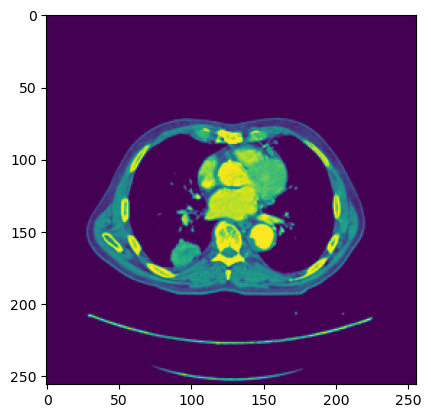

In [37]:
import matplotlib.pyplot as plt

# Create a figure object.
fig = plt.figure()

# Add a subplot to the figure object.
ax = fig.add_subplot(1, 1, 1)

# Display the first image in the subplot.
ax.imshow(all_images[22])

# Show the figure object.
plt.show()


